# Universidad de La Sabana 

**Felix Mohr**

## Facultad de Ingenería 2022.2
Supervised Machine Learning


- Gerson Barrera
- Santiago Merchán
- Tomás Cárdenas
- Emanuel Díaz

# Excercise 1

In [ ]:
!pip install awscli
!pip install boto3
!pip install boto3 pandas "s3fs<=0.4"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import libraries

#Mining
import pandas as pd
import numpy as np
from numpy.core.function_base import linspace

#Visualization
import matplotlib.pyplot as plt

#Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


#Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score

#Model Selection
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [ ]:
import os
import boto3
from io import StringIO , BytesIO

1. Write a function visualize_classifier_behavior(learner, X, y, ax = None) that
receives a sklearn classifier object, data X and y, and, optionally, an axis object from
matplotlib. 

In [ ]:
def visualize_classifier_behavior(learner, X, y, ax = None):
  #Entrenamiento
  learner.fit(X,y)
  #Identificación de maximos y minimos
  x_0range_min = (min(X[:,0])-1)
  x_0range_max = (max(X[:,0])+1)
  x_1range_min = (min(X[:,1])-1)
  x_1range_max = (max(X[:,1])+1)
  #Creación del espacio linear
  D1=linspace(start=x_0range_min, stop=x_0range_max,num=100)
  D2=linspace(start=x_1range_min, stop=x_1range_max,num=100)
  #Matriz
  Z=[]
  for i in D1:
    for j in D2:
      Z.append([i,j])
  matriz=pd.DataFrame(Z)
  predict=learner.predict(matriz.loc[:,[0,1]])
  #Grafica
  df = pd.DataFrame(data = predict.reshape(100,100), 
                  index = D1, 
                  columns = D2)
  plt.imshow(df)

2. Load the iris dataset (you can use pandas.read_csv) and create objects X and y from it, using the class column for y.

In [ ]:
csv_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
col_names = ['sepal_Length','sepal_Width','petal_Length','petal_Width','species']
iris =  pd.read_csv(csv_url, names = col_names)
iris["y"]=LabelEncoder().fit_transform(iris['species'])
#iris["species"].value_counts(dropna=False)
iris.groupby(["y","species"],as_index=False).agg({"sepal_Length":"size"})

,y,species,sepal_Length
0,0,Iris-setosa,50
1,1,Iris-versicolor,50
2,2,Iris-virginica,50


In [ ]:
X=(iris.loc[:,['sepal_Length','sepal_Width']]).values
y=(iris.loc[:,['y']]).values

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


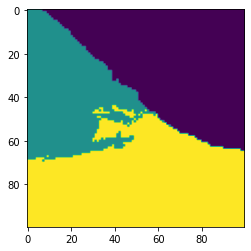

In [ ]:
visualize_classifier_behavior(KNeighborsClassifier(),X, y, ax = None)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


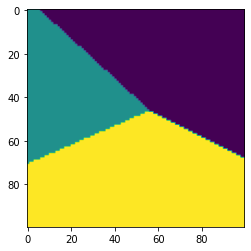

In [ ]:
visualize_classifier_behavior(LogisticRegression(),X, y, ax = None)

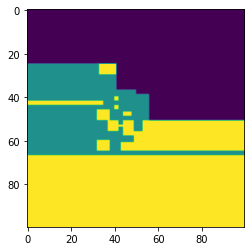

In [ ]:
visualize_classifier_behavior(DecisionTreeClassifier(),X, y, ax = None)

3. In a loop of 5 repetitions, select 30 random instances of the dataset and create the same plots as of the previous exercise again while reducing the provided dataset from 150 to the 30 random instances (this should generate a 5 × 3 grid of 15 plots in total). What can you observe w.r.t. to the classifier behavior?

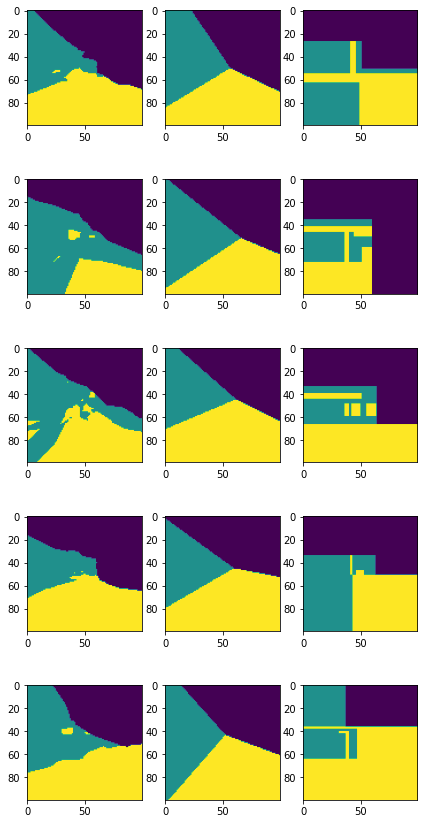

In [ ]:
#iris=pd.read_csv('iris.csv')
csv_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
col_names = ['sepal_Length','sepal_Width','petal_Length','petal_Width','species']
iris =  pd.read_csv(csv_url, names = col_names)


f, axarr = plt.subplots(5,3)
f.set_figheight(15)
f.set_figwidth(7)

for i in range(5):
  data=iris.sample(30)
  X=(data.loc[:,['sepal_Length','sepal_Width']]).values
  data["y"]=LabelEncoder().fit_transform(data['species'])
  y=np.ravel((data.loc[:,['y']]).values)
  j = 0
  for modelo in [KNeighborsClassifier(),LogisticRegression(),DecisionTreeClassifier()]:
    f.add_subplot(axarr[i,j])
    visualize_classifier_behavior(modelo,X, y, ax = None)
    j += 1

Compute and report the average error rate of the kNN classifier for 10 repetitions and a training size of 70%.

In [ ]:
acc = []
for i in range(10):
  x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
  y_train, y_test = np.ravel(y_train), np.ravel(y_test)
  modelo = KNeighborsClassifier()
  modelo.fit(x_train, y_train)
  predictions_dev = modelo.predict(x_train)
  #cm=confusion_matrix(y_train,predictions_dev,labels=[0,1])
  acc.append(round(accuracy_score(y_train,predictions_dev)*100, 4))
  #print(f"Recall Score: {round(recall_score(y_train,predictions_dev)*100, 4)}%")
  #print(f"Precision Score: {round(precision_score(y_train,predictions_dev)*100, 4)}%")
  #print(f"ROC AUC Score: {round(roc_auc_score(y_train,predictions_dev)*100, 4)}%")

print(f"Die durchschnittliche Fehler für 10 Wiederholungen ist: {round(100 - np.mean(acc), 2)}%")

Die durchschnittliche Fehler für 10 Wiederholungen ist: 11.9%


4. Create and plot learning curves of the three classifiers on the iris dataset (using accuracy as the metric). Which learner works best on which training sizes, which worst? Will more data help improve performance for any of them?

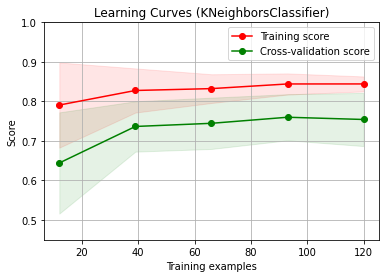

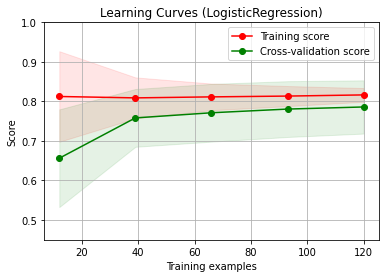

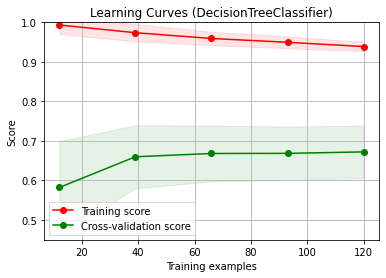

In [ ]:
splits = 100

X=(iris.loc[:,['sepal_Length','sepal_Width']]).values
iris["y"]=LabelEncoder().fit_transform(iris['species'])
y=np.ravel((iris.loc[:,['y']]).values)


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
 
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt



title = "Learning Curves (KNeighborsClassifier)"
cv = ShuffleSplit(n_splits=splits, test_size=0.2, random_state=0)
estimator = KNeighborsClassifier()
plot_learning_curve(estimator, title, X, y, ylim=(0.45, 1), cv=cv, n_jobs=10)

title = "Learning Curves (LogisticRegression)"
cv = ShuffleSplit(n_splits=splits, test_size=0.2, random_state=0)
estimator = LogisticRegression()
plot_learning_curve(estimator, title, X, y, (0.45, 1), cv=cv, n_jobs=10)

title = "Learning Curves (DecisionTreeClassifier)"
cv = ShuffleSplit(n_splits=splits, test_size=0.2, random_state=0)
estimator = DecisionTreeClassifier()
plot_learning_curve(estimator, title, X, y, (0.45, 1), cv=cv, n_jobs=10)

plt.show()

# Excercise 2

1. Choose a dataset from whichever source that serves to address a prediction problem.


In [ ]:
bucket = "unisabana-ml"
s3 = boto3.resource('s3',
          aws_access_key_id='AKIA...',
          aws_secret_access_key= 'C2nnmXFlEN...')

s3.Bucket(bucket).download_file(Key='opendata/heart.csv', Filename='heart.csv')
s3.Bucket(bucket).download_file(Key='opendata/fetal_health.csv', Filename='fetal_health.csv')
s3.Bucket(bucket).download_file(Key='opendata/Breast_Cancer.csv', Filename='Breast_Cancer.csv')

heart_df = pd.read_csv('heart.csv')
fetal_health_df = pd.read_csv('fetal_health.csv')
cancer_df = pd.read_csv('Breast_Cancer.csv')


In [ ]:
cancer_df.info()
cancer_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [ ]:
cancer_df.describe(include="object")

,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Estrogen Status,Progesterone Status,Status
count,4024,4024,4024,4024,4024,4024,4024,4024,4024,4024,4024
unique,3,5,4,3,5,4,4,2,2,2,2
top,White,Married,T2,N1,IIA,Moderately differentiated,2,Regional,Positive,Positive,Alive
freq,3413,2643,1786,2732,1305,2351,2351,3932,3755,3326,3408


In [ ]:
cancer_df.nunique()

Age                        40
Race                        3
Marital Status              5
T Stage                     4
N Stage                     3
6th Stage                   5
differentiate               4
Grade                       4
A Stage                     2
Tumor Size                110
Estrogen Status             2
Progesterone Status         2
Regional Node Examined     54
Reginol Node Positive      38
Survival Months           107
Status                      2
dtype: int64

In [ ]:
cancer_df.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [ ]:
list2delete = ['Status', 'Regional Node Examined','Reginol Node Positive']
list2transform = ['Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage','differentiate', 'A Stage', 'Estrogen Status', 'Progesterone Status']

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

cancer_df = pd.read_csv('Breast_Cancer.csv')

cancer_df = cancer_df[ cancer_df['Grade'] != ' anaplastic; Grade IV']
cancer_df = cancer_df.reset_index( drop = True)
#cancer_df = cancer_df[ cancer_df['Grade'] != np.nan]
encoder = OneHotEncoder(drop='first', sparse=False).fit(cancer_df[list2transform])
test = pd.DataFrame(encoder.transform(cancer_df[list2transform]))
test.columns = encoder.get_feature_names(list2transform)

model_master = cancer_df.drop(list2delete,axis=1)
model_master = cancer_df.drop(list2transform,axis=1).drop(['Status'], axis=1)

lista = list(model_master)
model_master = MinMaxScaler().fit_transform(model_master)

model_master = pd.DataFrame(model_master, columns = lista)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
model_master

,Age,Grade,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
0,0.974359,1.0,0.021583,0.383333,0.000000,0.556604
1,0.512821,0.5,0.244604,0.216667,0.088889,0.575472
2,0.717949,0.5,0.446043,0.216667,0.133333,0.698113
3,0.717949,1.0,0.122302,0.016667,0.000000,0.783019
4,0.435897,1.0,0.287770,0.033333,0.000000,0.462264
...,...,...,...,...,...,...
4000,0.820513,0.5,0.057554,0.000000,0.000000,0.452830
4001,0.666667,0.5,0.323741,0.216667,0.155556,0.641509
4002,0.974359,0.5,0.151079,0.166667,0.044444,0.641509
4003,0.717949,0.5,0.309353,0.166667,0.000000,0.669811


In [ ]:
X = pd.concat([model_master,test], axis=1)
X  = X [ X ['Grade'] != np.nan]
cancer_df["target"] = LabelEncoder().fit_transform(cancer_df['Status'])
y = cancer_df["target"] 

In [ ]:
X

,Age,Grade,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,Race_Other,Race_White,Marital Status_Married,Marital Status_Separated,...,N Stage_N3,6th Stage_IIB,6th Stage_IIIA,6th Stage_IIIB,6th Stage_IIIC,differentiate_Poorly differentiated,differentiate_Well differentiated,A Stage_Regional,Estrogen Status_Positive,Progesterone Status_Positive
0,0.974359,1.0,0.021583,0.383333,0.000000,0.556604,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
1,0.512821,0.5,0.244604,0.216667,0.088889,0.575472,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
2,0.717949,0.5,0.446043,0.216667,0.133333,0.698113,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
3,0.717949,1.0,0.122302,0.016667,0.000000,0.783019,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
4,0.435897,1.0,0.287770,0.033333,0.000000,0.462264,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4000,0.820513,0.5,0.057554,0.000000,0.000000,0.452830,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4001,0.666667,0.5,0.323741,0.216667,0.155556,0.641509,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4002,0.974359,0.5,0.151079,0.166667,0.044444,0.641509,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4003,0.717949,0.5,0.309353,0.166667,0.000000,0.669811,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0


In [ ]:
y.value_counts(dropna= False)

0    3398
1     607
Name: target, dtype: int64

In [ ]:
X.isna().sum()

Age                                    0
Grade                                  0
Tumor Size                             0
Regional Node Examined                 0
Reginol Node Positive                  0
Survival Months                        0
Race_Other                             0
Race_White                             0
Marital Status_Married                 0
Marital Status_Separated               0
Marital Status_Single                  0
Marital Status_Widowed                 0
T Stage _T2                            0
T Stage _T3                            0
T Stage _T4                            0
N Stage_N2                             0
N Stage_N3                             0
6th Stage_IIB                          0
6th Stage_IIIA                         0
6th Stage_IIIB                         0
6th Stage_IIIC                         0
differentiate_Poorly differentiated    0
differentiate_Well differentiated      0
A Stage_Regional                       0
Estrogen Status_

In [ ]:
#X.Grade = X.Grade.fillna()
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

modelo = LogisticRegression()
modelo.fit(x_train, y_train)
predictions_dev = modelo.predict(x_train)
#cm=confusion_matrix(y_train,predictions_dev,labels=[0,1])
acc = round(accuracy_score(y_train,predictions_dev)*100, 4)
print(f"Die durchschnittliche Fehler für 10 Wiederholungen ist: {round(100 - np.mean(acc), 2)}%")

Die durchschnittliche Fehler für 10 Wiederholungen ist: 10.27%


In [ ]:
D_Analysis = x_train.copy()
D_Analysis['y'] = y_train

D_Test = x_test.copy()
D_Test['y'] = y_test

D_Analysis.to_csv('D_Analysis.txt', sep="|", header= True, index= False)
D_Test.to_csv('D_Test.txt', sep= "|", header = True, index= False)

3. Create learning curves for the three classifiers from Exercise 1 on the analysis dataset.

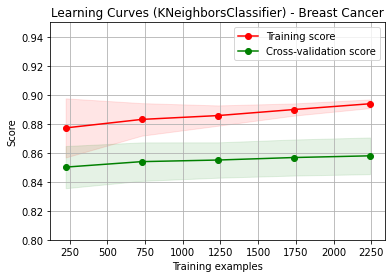

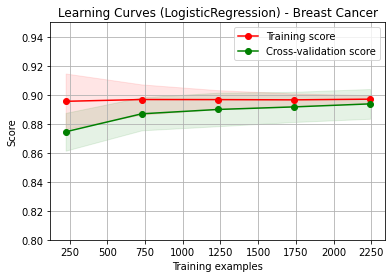

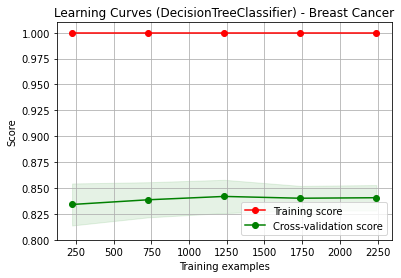

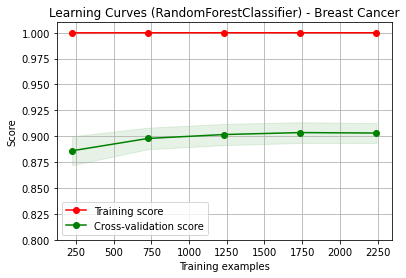

In [ ]:
splits = 100

X = x_train
y = y_train

title = "Learning Curves (KNeighborsClassifier) - Breast Cancer"
cv = ShuffleSplit(n_splits=splits, test_size=0.2, random_state=0)
estimator = KNeighborsClassifier()
plot_learning_curve(estimator, title, X, y, ylim=(0.8, 0.950), cv=cv, n_jobs=10)

title = "Learning Curves (LogisticRegression) - Breast Cancer"
cv = ShuffleSplit(n_splits=splits, test_size=0.2, random_state=0)
estimator = LogisticRegression()
plot_learning_curve(estimator, title, X, y, (0.8, 0.950), cv=cv, n_jobs=10)

title = "Learning Curves (DecisionTreeClassifier) - Breast Cancer"
cv = ShuffleSplit(n_splits=splits, test_size=0.2, random_state=0)
estimator = DecisionTreeClassifier()
plot_learning_curve(estimator, title, X, y, (0.8, 1.01), cv=cv, n_jobs=10)

title = "Learning Curves (RandomForestClassifier) - Breast Cancer"
cv = ShuffleSplit(n_splits=splits, test_size=0.2, random_state=0)
estimator = RandomForestClassifier()
plot_learning_curve(estimator, title, X, y, (0.8, 1.01), cv=cv, n_jobs=10)


plt.show()

In [ ]:
model = RandomForestClassifier()
model.fit(x_train, y_train)
predictions = model.predict(x_train)

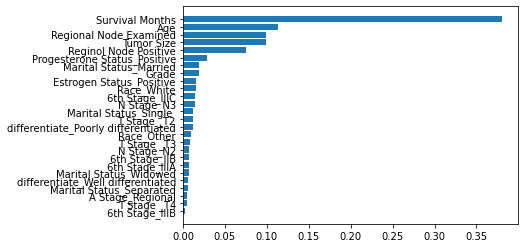

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)
fig, ax = plt.subplots()
ax.barh(range(len(importances)),
                           importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(x_train.columns)[indices])

In [ ]:
import seaborn as sns
cf_matrix=confusion_matrix(y_train,predictions,labels=[0,1])

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,


SyntaxError: ignored

4. Make a statement about learnability in the data you have chosen.

La habilidad de aprendizaje de los modelos entrenados en la base de datos seleccionada es bueno, ya que a medida que aumenta la cantidad de datos en los 3 modelos se aprecia que hay un aprendizaje significativo al inicio de las iteraciones y logra encontrar estabilidad. Aunque el error del modelo nos muestra que los datos son capaces de pronosticar correctamente la variable objetivo en la mayoría de los casos, creemos que incluir mayor cantidad de atributos y hacer Feature engineering sobre los atributos existentes podría mejorar la tasa de aprendizaje, al tiempo que disminuye el error del mismo. En resumen, el modelo se acerca a la ground truth por medio de la hipótesis planteada, ak.a. puede predecir correctamente la variable de respuesta seleccionada.